## 1- import libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go

import warnings

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from catboost import CatBoostClassifier 

warnings.filterwarnings('ignore')

## 2- Read dataset

In [2]:
data = pd.read_csv("/kaggle/input/phone-classification-dataset/phone.csv")

## 3- Data analysis

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [5]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [8]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
data.shape

(2000, 21)

In [10]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## 4- Data visualization

In [11]:
fig = px.histogram(data, x='battery_power', nbins=30, title='Histogram of Battery Power')
fig.update_layout(xaxis_title='Battery Power', yaxis_title='Frequency')
fig.show()

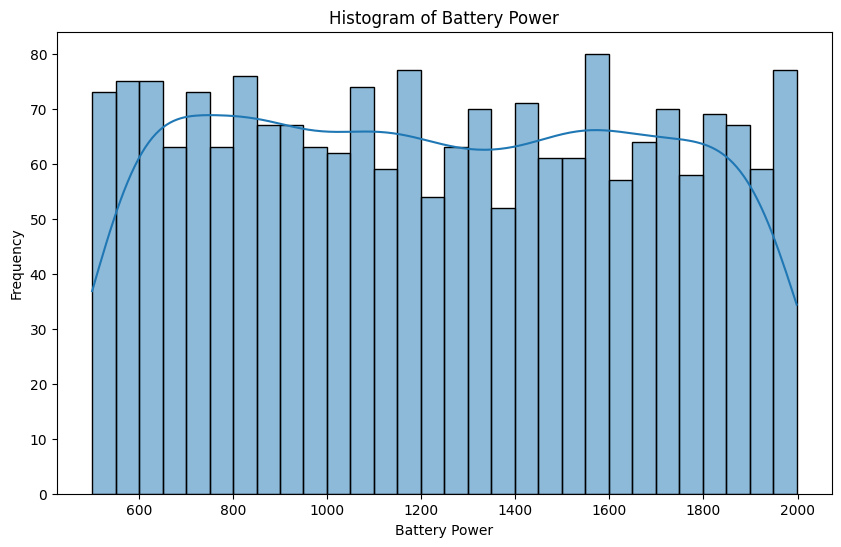

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['battery_power'], bins=30, kde=True)
plt.title('Histogram of Battery Power')
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.show()

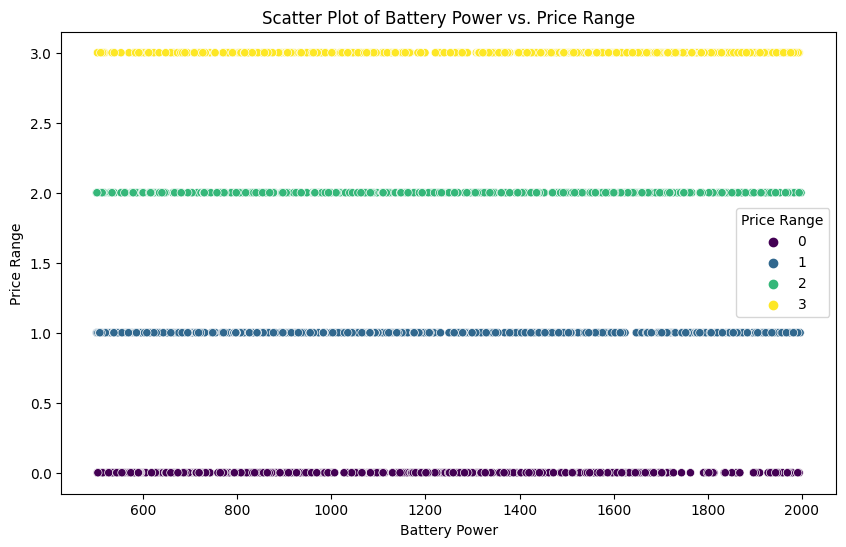

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='battery_power', y='price_range', hue='price_range', palette='viridis')
plt.title('Scatter Plot of Battery Power vs. Price Range')
plt.xlabel('Battery Power')
plt.ylabel('Price Range')
plt.legend(title='Price Range')
plt.show()

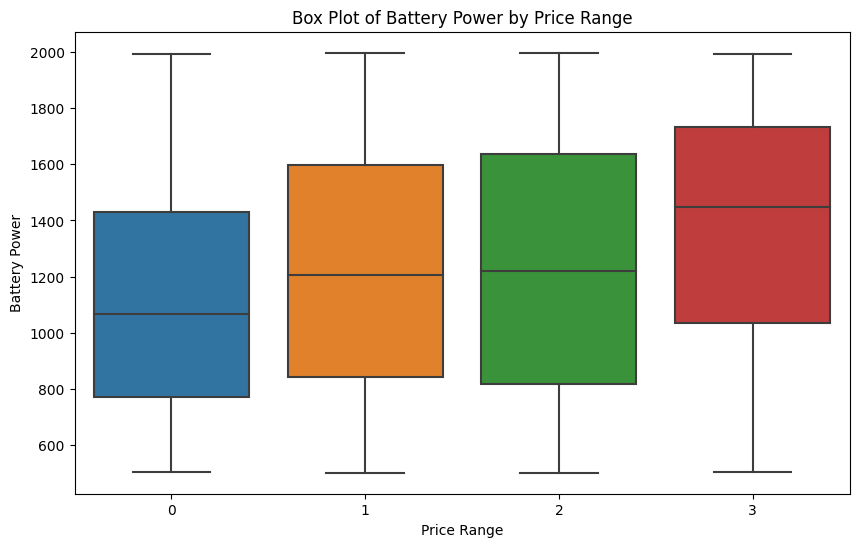

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='price_range', y='battery_power')
plt.title('Box Plot of Battery Power by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()

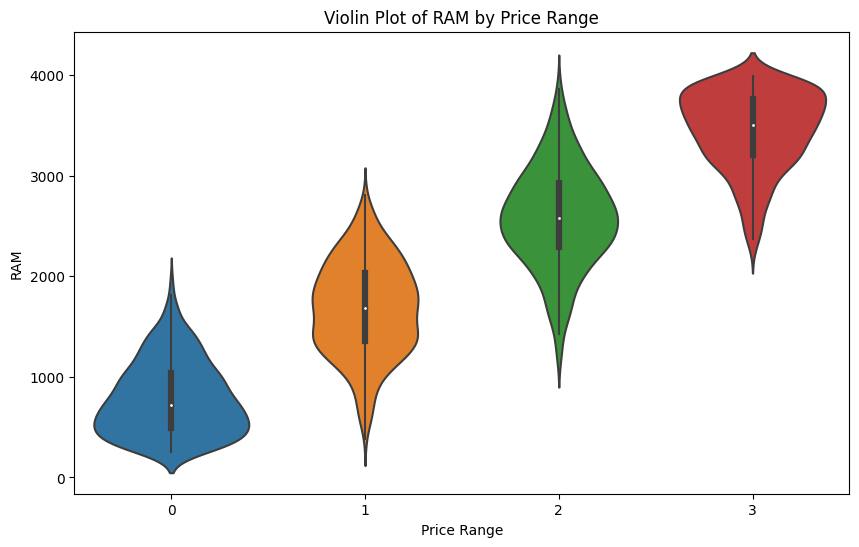

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='price_range', y='ram')
plt.title('Violin Plot of RAM by Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.show()

In [16]:
fig = px.scatter(data, x='battery_power', y='price_range', color='price_range', 
                 color_continuous_scale='Viridis', title='Scatter Plot of Battery Power vs. Price Range')
fig.update_layout(xaxis_title='Battery Power', yaxis_title='Price Range')
fig.show()

In [17]:
fig = px.box(data, x='price_range', y='battery_power', title='Box Plot of Battery Power by Price Range')
fig.update_layout(xaxis_title='Price Range', yaxis_title='Battery Power')
fig.show()

In [18]:
corr = data.corr()
fig = px.imshow(corr, title='Heatmap of Correlation Matrix', color_continuous_scale='RdBu_r', zmin=-1, zmax=1)
fig.update_layout(xaxis_title='Features', yaxis_title='Features')
fig.show()

In [19]:
fig = px.scatter_matrix(data, dimensions=['battery_power', 'clock_speed', 'ram', 'price_range'],
                        color='price_range', title='Pair Plot of Selected Features')
fig.update_layout()
fig.show()

In [20]:
fig = px.violin(data, y='ram', x='price_range', box=True, points='all', title='Violin Plot of RAM by Price Range')
fig.update_layout(xaxis_title='Price Range', yaxis_title='RAM')
fig.show()

In [21]:
avg_battery_power = data.groupby('price_range')['battery_power'].mean().reset_index()
fig = px.bar(avg_battery_power, x='price_range', y='battery_power', title='Average Battery Power by Price Range')
fig.update_layout(xaxis_title='Price Range', yaxis_title='Average Battery Power')
fig.show()

In [22]:
fig = px.pie(data, names='price_range', title='Distribution of Phones by Price Range')
fig.show()

In [23]:
fig = px.line(data, y='clock_speed', title='Line Plot of Clock Speed Over Index')
fig.update_layout(xaxis_title='Index', yaxis_title='Clock Speed')
fig.show()

In [24]:
fig = px.histogram(data, x='ram', nbins=30, title='Distribution of RAM')
fig.update_layout(xaxis_title='RAM', yaxis_title='Frequency')
fig.show()

In [25]:
fig = px.scatter(data, x='ram', y='battery_power', color='price_range', color_continuous_scale='Viridis',
                 title='Scatter Plot of RAM vs. Battery Power')
fig.update_layout(xaxis_title='RAM', yaxis_title='Battery Power')
fig.show()

In [26]:
fig = px.box(data, x='price_range', y='clock_speed', title='Box Plot of Clock Speed by Price Range')
fig.update_layout(xaxis_title='Price Range', yaxis_title='Clock Speed')
fig.show()

In [27]:
fig = go.Figure(data=[go.Scatter3d(
    x=data['battery_power'],
    y=data['ram'],
    z=data['price_range'],
    mode='markers',
    marker=dict(size=5, color=data['price_range'], colorscale='Viridis', opacity=0.8)
)])
fig.update_layout(
    title='3D Scatter Plot of Battery Power, RAM, and Price Range',
    scene=dict(
        xaxis_title='Battery Power',
        yaxis_title='RAM',
        zaxis_title='Price Range'
    )
)
fig.show()

## 5- Spiliting the data

In [28]:
x = data [['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]
y= data['price_range']

In [29]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state =42)

In [30]:
x_train.shape

(1600, 20)

In [31]:
x_test.shape

(400, 20)

## 6- Buildint the model 

In [32]:
model = CatBoostClassifier( 
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    verbose=200)

In [33]:
model.fit(x_train,y_train)

0:	learn: 1.2549245	total: 58ms	remaining: 58s
200:	learn: 0.0941380	total: 865ms	remaining: 3.44s
400:	learn: 0.0447778	total: 1.66s	remaining: 2.48s
600:	learn: 0.0265505	total: 2.44s	remaining: 1.62s
800:	learn: 0.0183592	total: 3.22s	remaining: 801ms
999:	learn: 0.0136180	total: 4s	remaining: 0us


In [34]:
y_pred = model.predict(x_test)

## 7- Evaluating the model

In [35]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9275


In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("confusion_matrix")
print(conf_matrix)

confusion_matrix
[[100   5   0   0]
 [  2  89   0   0]
 [  0   9  77   6]
 [  0   0   7 105]]


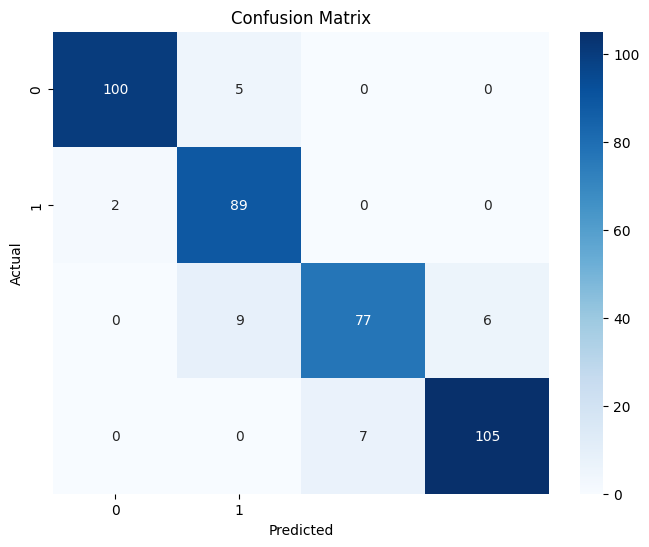

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
class_report = classification_report(y_test, y_pred)
print("classification_report")
print(class_report)

classification_report
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       105
           1       0.86      0.98      0.92        91
           2       0.92      0.84      0.88        92
           3       0.95      0.94      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

